In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("mbsampler.jl")
include("temp.jl")

plot_acfs_all (generic function with 2 methods)

In [2]:
stratified = false
cov_dists = ["Laplace", "Gaussian", "uniform"]
n_reps = 50

50

In [3]:
subfolder = "scaling_pX"
pX_list = logspace(-2,0,8)
bts_pX = zeros(length(pX_list), n_reps, 4, length(cov_dists),2)
@showprogress for rep in 1:n_reps
    for (i,pX) in enumerate(pX_list) 
        for CV in [true,false] 
            for weighted in [true,false] 
                for (j,cov_dist) in enumerate(cov_dists)
                    for (k,d) in enumerate([5]) 
                        filename  = "/xtmp/PDMP_data_revision/"*subfolder*"/cov_dist:"*cov_dist*"-pX:"*
                        string(pX)*"-rep:"*string(rep)*"-stratified:"*string(stratified)*
                        "-CV:"*string(CV)*"-weighted:"*string(weighted)*"-d:"*string(d)*".jld"
                        skel, bt = load(filename, "xt_skeleton", "bt_skeleton")
                        bts_pX[i,rep,1+CV+2*weighted,j,k] = bt[end]
                        skel, bt = nothing, nothing
                        gc()
                    end
                end
            end
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:05:47


In [124]:
skels_d_large = fill(randn(1,1), 8,4,3)
bts_d_large = fill(randn(1,1), 8,4,3);

In [204]:
subfolder = "scaling_pX"
pX_list = logspace(-2,0,8)
bts_pX_d_large = zeros(length(pX_list), n_reps, 4, length(cov_dists),2)
@showprogress for rep in 1:1
    for (i,pX) in enumerate(pX_list) 
        for CV in [true,false] 
            for weighted in [true,false] 
                for (j,cov_dist) in enumerate(cov_dists)
                    for (k,d) in enumerate([50]) 
                        filename  = "/xtmp/PDMP_data_revision/"*subfolder*"/cov_dist:"*cov_dist*"-pX:"*
                        string(pX)*"-rep:"*string(rep)*"-stratified:"*string(stratified)*
                        "-CV:"*string(CV)*"-weighted:"*string(weighted)*"-d:"*string(d)*".jld"
                        skels_d_large[i,1+CV+2*weighted,j], bts_d_large[i,1+CV+2*weighted,j] = 
                        load(filename, "xt_skeleton", "bt_skeleton")
                        gc()
                    end
                end
            end
        end
    end
end

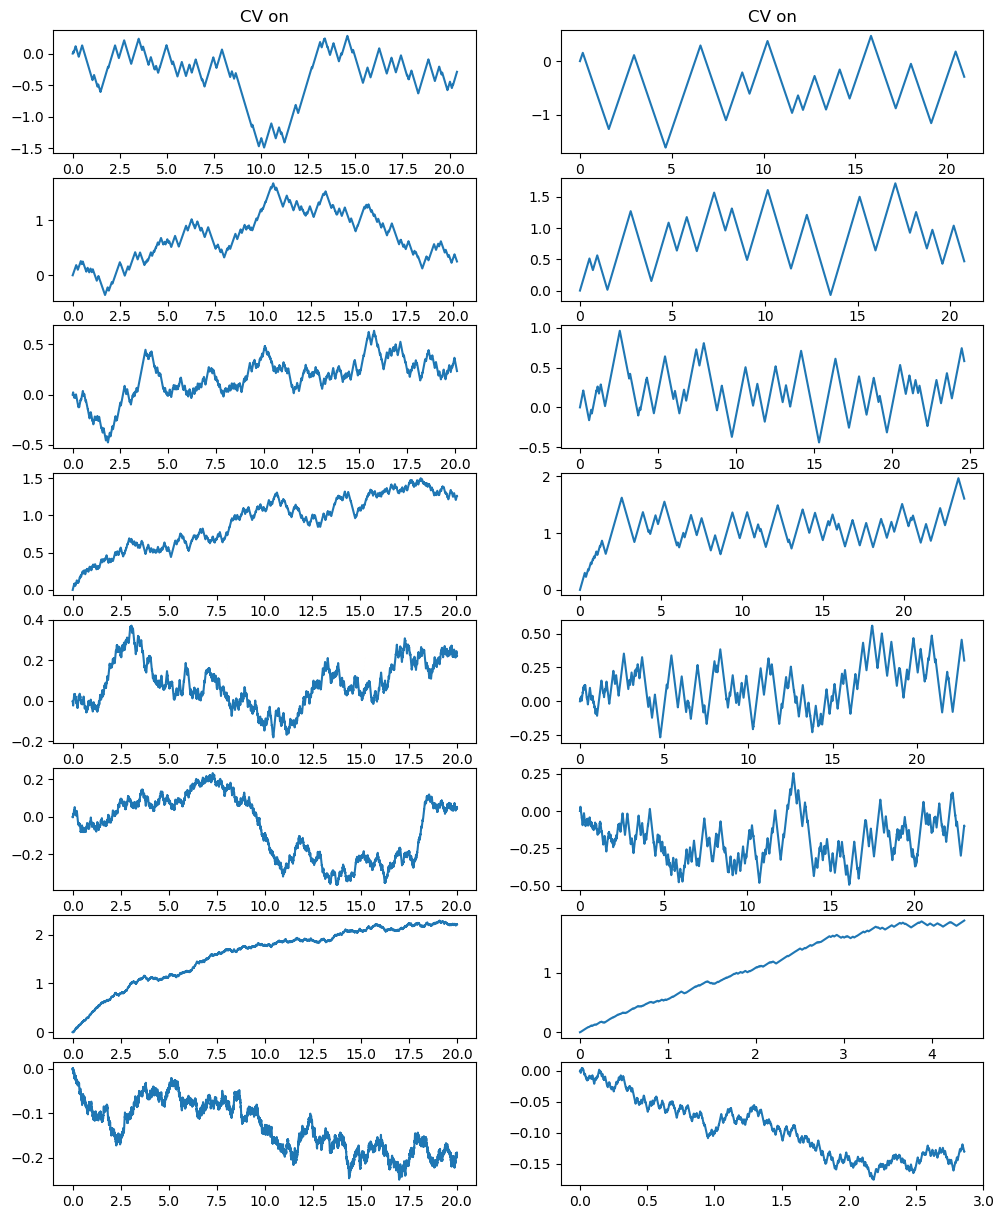

In [233]:
i = 2 # indexes sparsity level (from 0.01 to 1)
j = 3 # indexes covariate distribution (Laplace, Gaussian, uniform)
dim = 1 #the dimension we plot 

fig = figure("pyplot_subplot_mixed", figsize=(12,15))
for i in 1:8
    subplot(8,2,2*(i-1)+1)
    CV = false
    weighted = false
    plot(bts_d_large[i,1+CV+2*weighted,j][1,:], skels_d_large[i,1+CV+2*weighted,j][dim,:])
    if i == 1 title("CV off") end

    subplot(8,2,2*(i-1)+2)
    CV = true
#     weighted = false
    plot(bts_d_large[i,1+CV+2*weighted,j][1,:], skels_d_large[i,1+CV+2*weighted,j][dim,:])
    if i == 1 title("CV on") end
end

In [4]:
subfolder = "scaling_Nobs"
Nobs_list = Int.(floor.(logspace(1,log(10,5e3),8)))
bts_Nobs = zeros(length(Nobs_list), n_reps, 4, length(cov_dists), 2)
@showprogress for rep in 1:n_reps
    for (i,Nobs) in enumerate(Nobs_list) 
        for CV in [true,false] 
            for weighted in [true,false] 
                for (j,cov_dist) in enumerate(cov_dists)
                    for (k,d) in enumerate([5])
                        filename = "/xtmp/PDMP_data_revision/"*subfolder*"/cov_dist:"*cov_dist*"-Nobs:"*
                                    string(Nobs)*"-rep:"*string(rep)*"-stratified:"*string(stratified)*
                                    "-CV:"*string(CV)*"-weighted:"*string(weighted)*"-d:"*string(d)*".jld"
                        skel, bt = load(filename, "xt_skeleton", "bt_skeleton")
                        bts_Nobs[i,rep,1+CV+2*weighted,j,k] = bt[end]
                        skel, bt = nothing, nothing
                        gc()
                    end
                end
            end
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:05:48


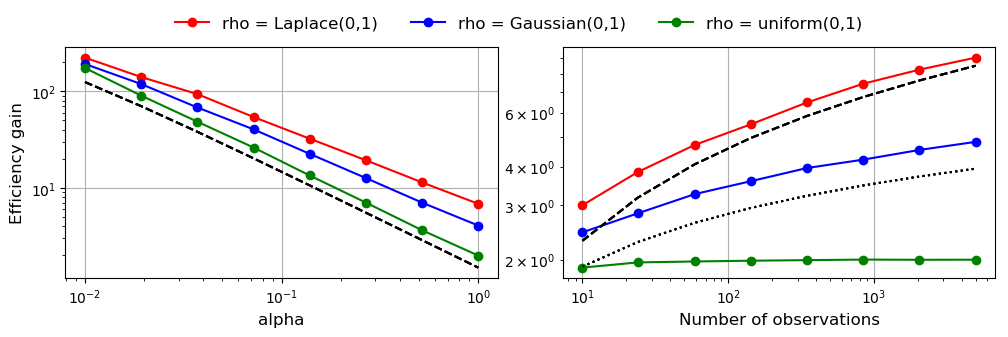

In [8]:
fig = figure("pyplot_subplot_mixed", figsize=(12,3))
subplot(121)
to_plot = zeros(size(bts_pX,1),2,3)
for i in 1:size(to_plot,1) 
    for j in 1:3
        a, b = bts_pX[i,:,3,j,1]./bts_pX[i,:,1,j,1], bts_pX[i,:,4,j,1]./bts_pX[i,:,2,j,1]
        to_plot[i,1,j] = mean(a[a.<Inf])
        to_plot[i,2,j] = mean(b[b.<Inf])
    end
end
k = 1
colours = ["red", "blue", "green"]
pX_list = logspace(-2,0,8)
Nobs_list = repeat([500], length(pX_list))
for (j,cov_dist) in enumerate(cov_dists)
    plot(pX_list, to_plot[:,1,j], "o-", color=colours[j], label="rho = "*cov_dist*"(0,1)")
    plot(pX_list, 1.5*pX_list.*Nobs_list./(1+pX_list.*Nobs_list)./pX_list, "--", color="black")
#     plot(pX_list, to_plot[:,2,j], "s-", color=colours[j], label="cov_dist:"cov_dist*"; CV true")
    xlabel("alpha", fontsize=12)
    ylabel("Efficiency gain", fontsize=12)
    grid(true)
    xscale("log")
    yscale("log")
end
legend(frameon=false, ncol=4,bbox_to_anchor=(0.22, 1.2), loc=2, fontsize=12)
subplot(122)
k = 1
colours = ["red", "blue", "green"]
Nobs_list = Int.(floor.(logspace(1,log(10,5e3),8)))
p1 = log.(Nobs_list)
p2 = sqrt.(log.(Nobs_list.^2./(2*pi*log.(Nobs_list.^2/(2*pi))))).*(1+1./log.(Nobs_list))

for (j,cov_dist) in enumerate(cov_dists)
    plot(Nobs_list, mean(bts_Nobs[:,:,3,j,k]./bts_Nobs[:,:,1,j,k],2), "o-", 
         color=colours[j])
    plot(Nobs_list, p1, "k--")
    plot(Nobs_list, p2, "k:")
#     plot(Nobs_list, mean(bts_Nobs[:,:,4,j]./bts_Nobs[:,:,2,j],2), "s-", 
#          color=colours[j], label="cov_dist:"cov_dist*"; CV true")
    xlabel("Number of observations", fontsize=12)
    grid(true)
    xscale("log")
    yscale("log")
end
subplots_adjust(wspace=0.15)
savefig("plots/scaling_bounds_noCV.pdf", format="pdf", dpi=10000, bbox_inches="tight");

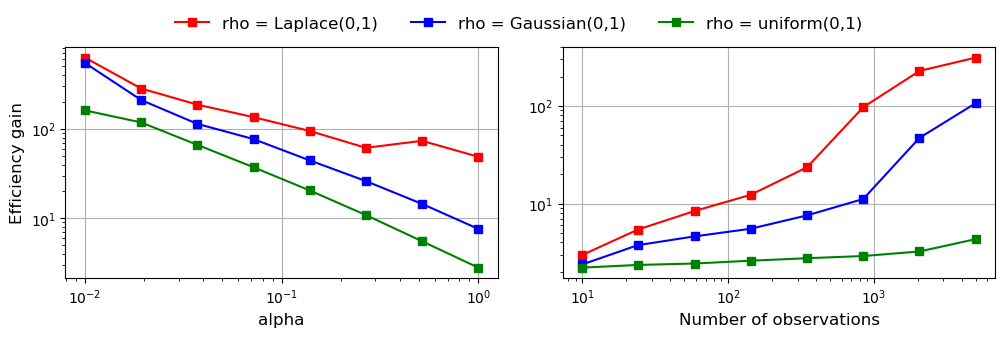

In [9]:
fig = figure("pyplot_subplot_mixed", figsize=(12,3))
subplot(121)
to_plot = zeros(size(bts_pX,1),2,3)
for i in 1:size(to_plot,1) 
    for j in 1:3
        a, b = bts_pX[i,:,3,j,1]./bts_pX[i,:,1,j,1], bts_pX[i,:,4,j,1]./bts_pX[i,:,2,j,1]
        to_plot[i,1,j] = mean(a[a.<Inf])
        to_plot[i,2,j] = mean(b[b.<Inf])
    end
end
k = 1
colours = ["red", "blue", "green"]
pX_list = logspace(-2,0,8)
Nobs_list = repeat([500], length(pX_list))
for (j,cov_dist) in enumerate(cov_dists)
    plot(pX_list, to_plot[:,2,j], "s-", color=colours[j], label="rho = "cov_dist*"(0,1)")
    xlabel("alpha", fontsize=12)
    ylabel("Efficiency gain", fontsize=12)
    grid(true)
    xscale("log")
    yscale("log")
end
legend(frameon=false, ncol=4,bbox_to_anchor=(0.22, 1.2), loc=2, fontsize=12)
subplot(122)
k = 1
colours = ["red", "blue", "green"]
Nobs_list = Int.(floor.(logspace(1,log(10,5e3),8)))
p1 = log.(Nobs_list)
p2 = sqrt.(log.(Nobs_list.^2./(2*pi*log.(Nobs_list.^2/(2*pi))))).*(1+1./log.(Nobs_list))

for (j,cov_dist) in enumerate(cov_dists)
    plot(Nobs_list, mean(bts_Nobs[:,:,4,j]./bts_Nobs[:,:,2,j],2), "s-", 
         color=colours[j], label="cov_dist:"cov_dist)
    xlabel("Number of observations", fontsize=12)
    grid(true)
    xscale("log")
    yscale("log")
end
subplots_adjust(wspace=0.15)
savefig("plots/scaling_bounds_CV.pdf", format="pdf", dpi=10000, bbox_inches="tight");